In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
df = pd.read_csv(r"C:\Users\almal\Desktop\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df.shape

(10754, 22)

In [8]:
df.describe

<bound method NDFrame.describe of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name    

In [9]:
df.info

<bound method DataFrame.info of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name      

In [10]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

### Data Quality Checks

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [13]:
#The dataset is sourced from Kaggle, originally from https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [15]:
#The dataset is up-to-date, with data collected from the 2021-2022 and 2022-2023 seasons.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [17]:
#It is consistent

#### 4. Relevance: 


In [19]:
#It is sample Appropriateness

In [20]:
df.drop(['player' , 'name', 'position'], axis=1 , inplace=True)

In [21]:
df.shape

(10754, 19)

#### 5. Uniqueness: 


In [23]:
df[df.duplicated()]

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [24]:
#It is unique with no duplicated raws

#### 6. Completeness: 


In [26]:
df.isnull().sum()

team                   0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [27]:
# No null valuse

#### 7. Check Accuracy:

In [29]:
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [30]:
# All seems good

In [31]:
# Check outlier

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:

In [34]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

#### I. Categorical Variables:


#### II. Numerical Variables:


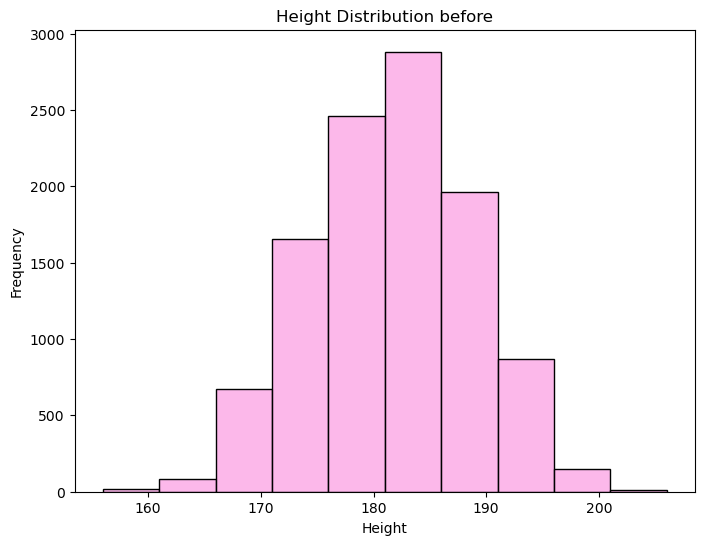

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['height'], bins=10, color='#fba0e3')
plt.title('Height Distribution before')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [38]:
df = df[(df['height'] >= 168) & (df['height'] <=195)] 

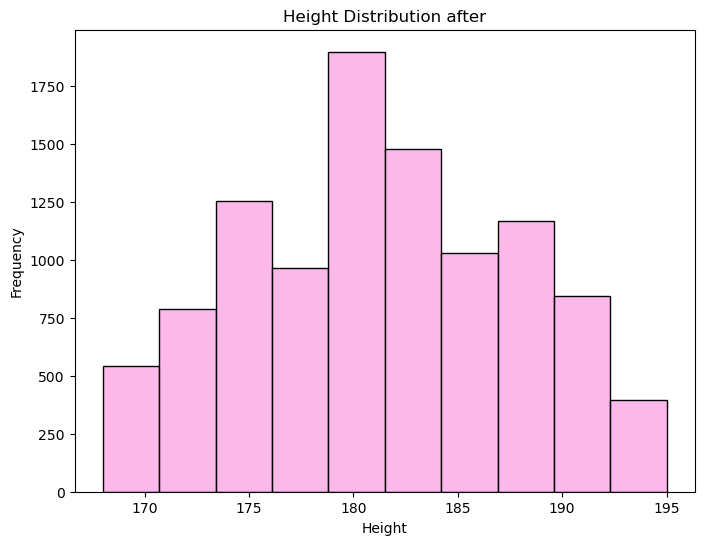

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['height'], bins=10, color='#fba0e3')
plt.title('Height Distribution after')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [40]:
df.shape

(10371, 19)

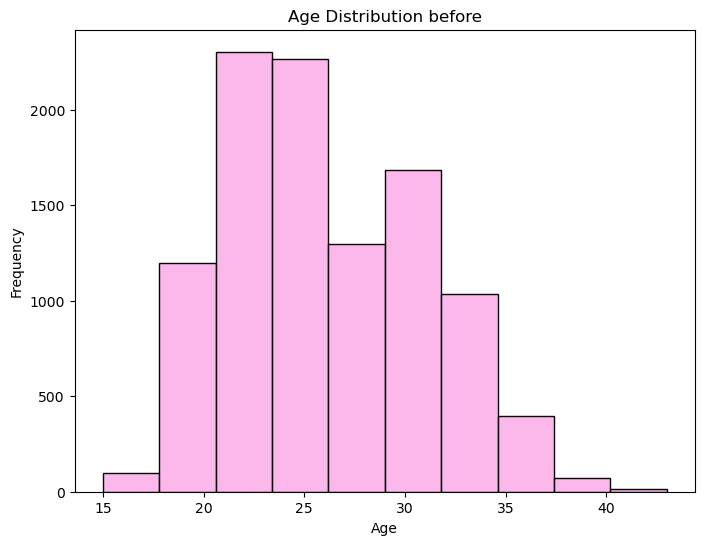

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10,color='#fba0e3')
plt.title('Age Distribution before')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [42]:
df = df[(df['age'] >= 18) & (df['age'] <=35)] 

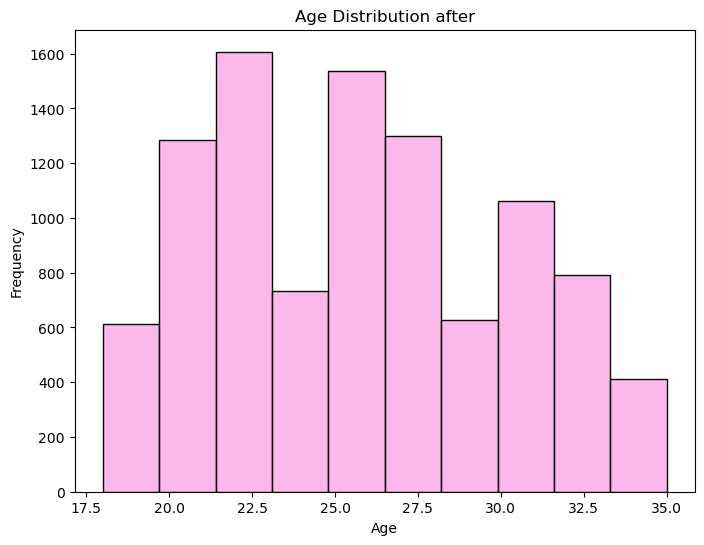

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10,color='#fba0e3')
plt.title('Age Distribution after')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [44]:
df.shape

(9958, 19)

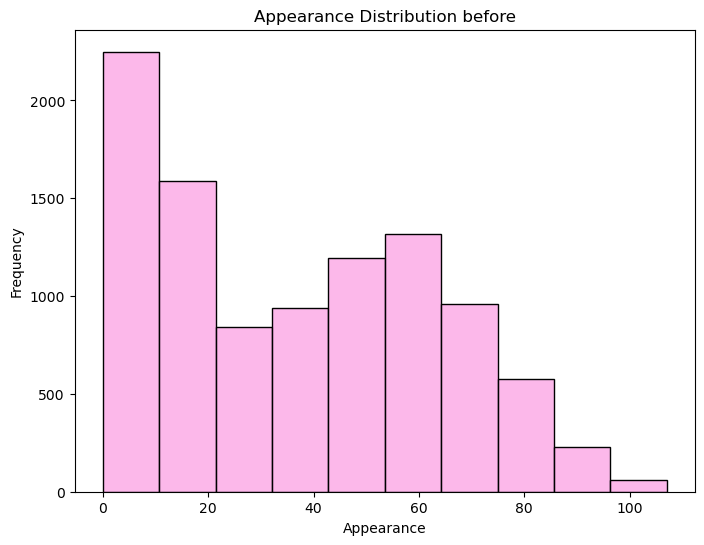

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['appearance'], bins=10, color='#fba0e3')
plt.title('Appearance Distribution before')
plt.xlabel('Appearance')
plt.ylabel('Frequency')
plt.show()

In [46]:
df = df[(df['appearance'] <=95)]

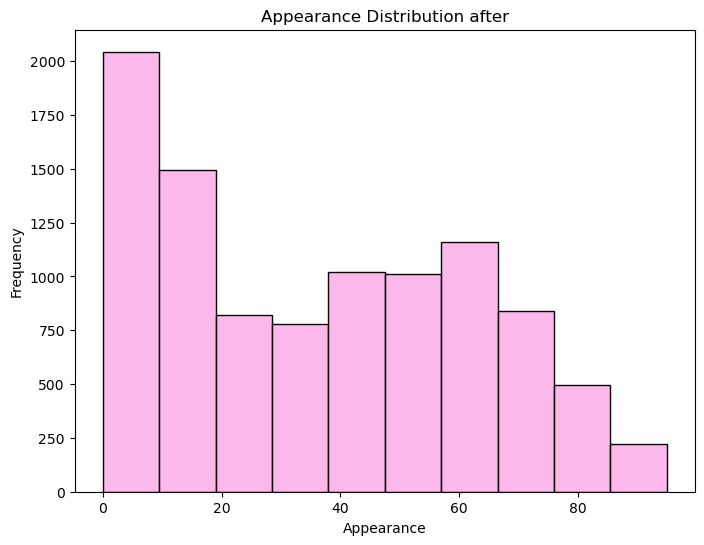

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['appearance'], bins=10, color='#fba0e3')
plt.title('Appearance Distribution after')
plt.xlabel('Appearance')
plt.ylabel('Frequency')
plt.show()

In [48]:
df.shape

(9891, 19)

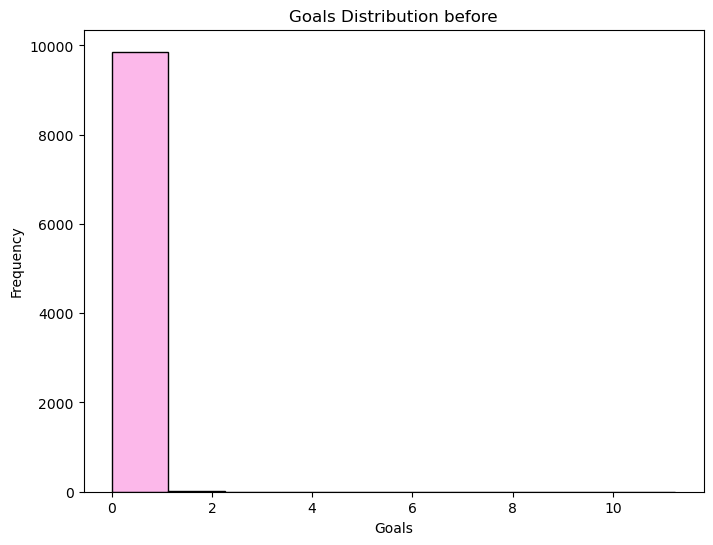

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals'], bins=10, color='#fba0e3')
plt.title('Goals Distribution before')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [50]:
df = df[(df['goals'] <=0.4)]

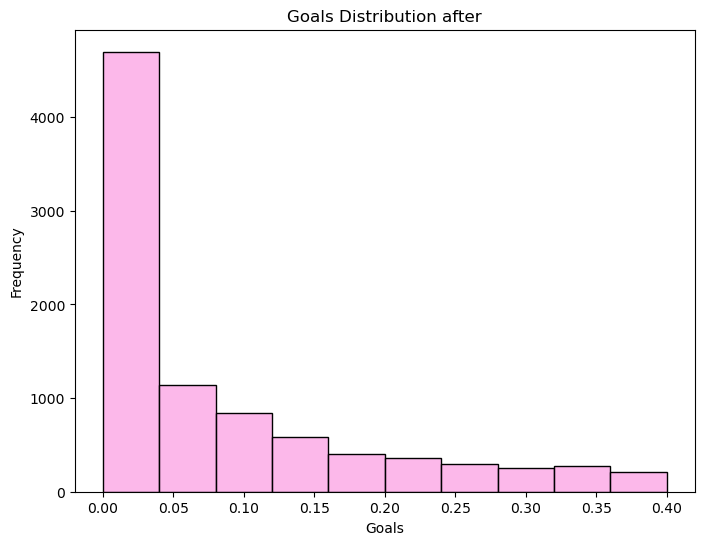

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals'], bins=10, color='#fba0e3')
plt.title('Goals Distribution after')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [52]:
df.shape

(9060, 19)

In [53]:
df['assists'].head(10)

3     0.056180
4     0.017889
5     0.000000
6     0.032901
7     0.000000
8     0.000000
9     0.169115
10    0.063096
11    0.033507
12    0.048439
Name: assists, dtype: float64

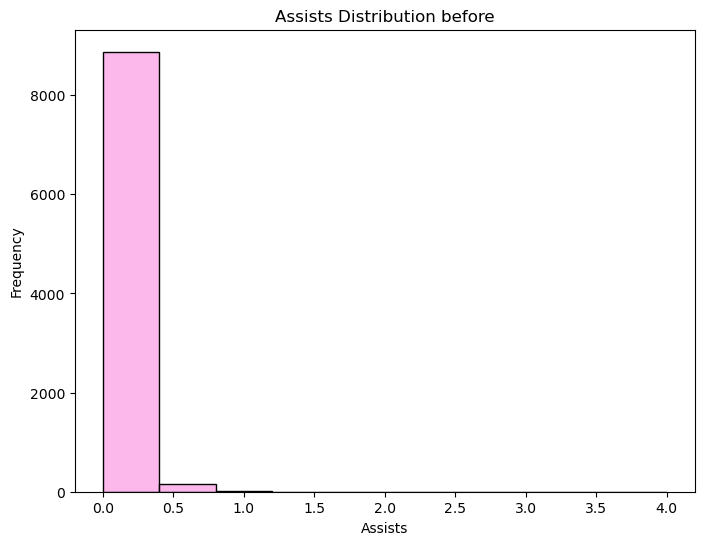

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['assists'], bins=10, color='#fba0e3')
plt.title('Assists Distribution before')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

In [55]:
df = df[(df['assists'] <=0.25)]

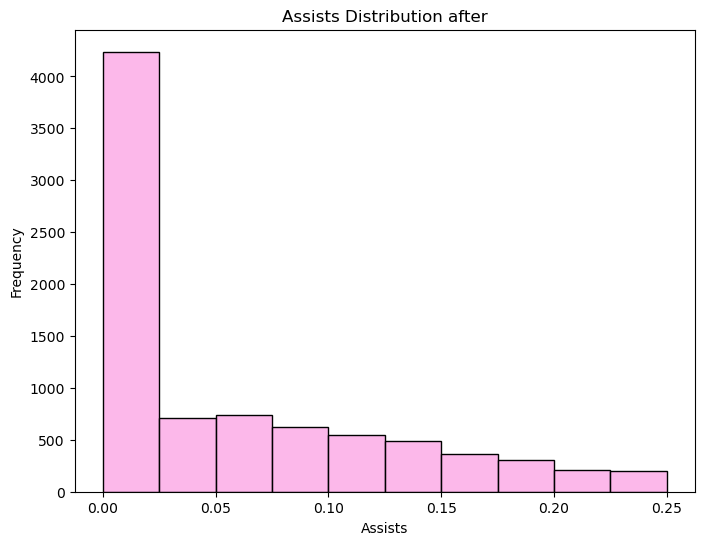

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df['assists'], bins=10, color='#fba0e3')
plt.title('Assists Distribution after')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

In [57]:
df.shape

(8438, 19)

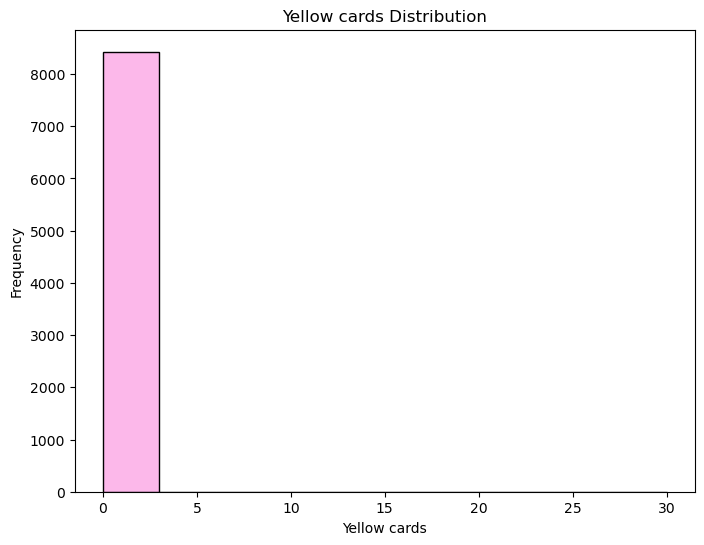

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yellow cards'], bins=10, color='#fba0e3')
plt.title('Yellow cards Distribution')
plt.xlabel('Yellow cards')
plt.ylabel('Frequency')
plt.show()

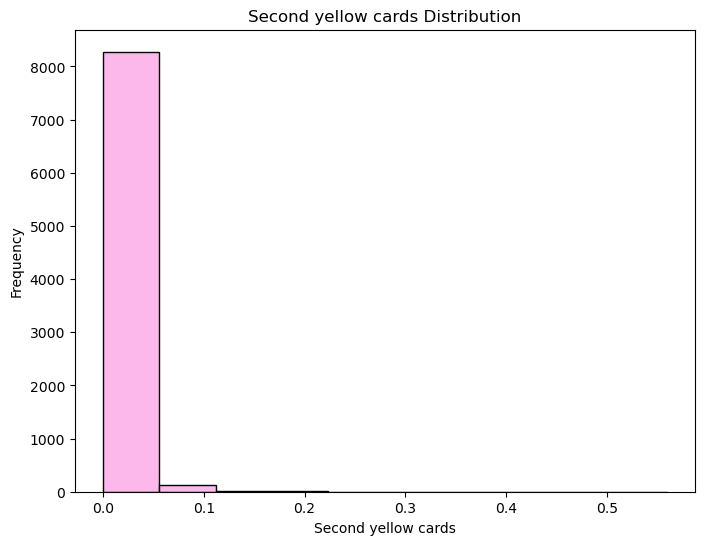

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(df['second yellow cards'], bins=10, color='#fba0e3')
plt.title('Second yellow cards Distribution')
plt.xlabel('Second yellow cards')
plt.ylabel('Frequency')
plt.show()

In [60]:
#It has no effect on the result, so I will not cut it.

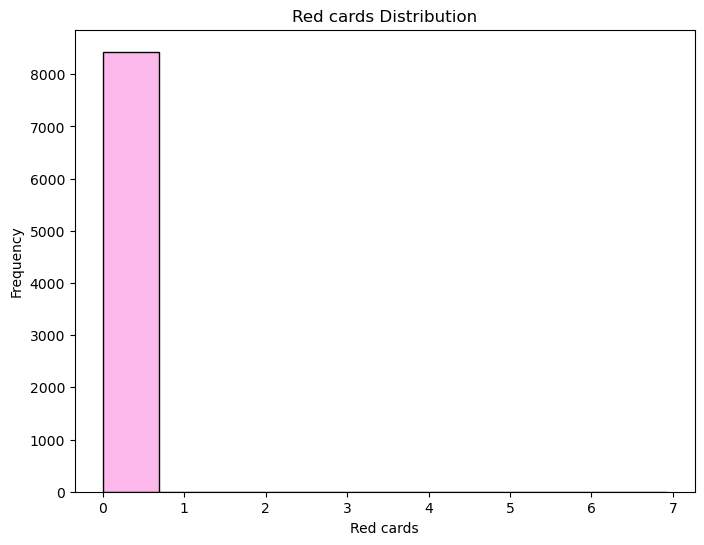

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(df['red cards'], bins=10, color='#fba0e3')
plt.title('Red cards Distribution')
plt.xlabel('Red cards')
plt.ylabel('Frequency')
plt.show()

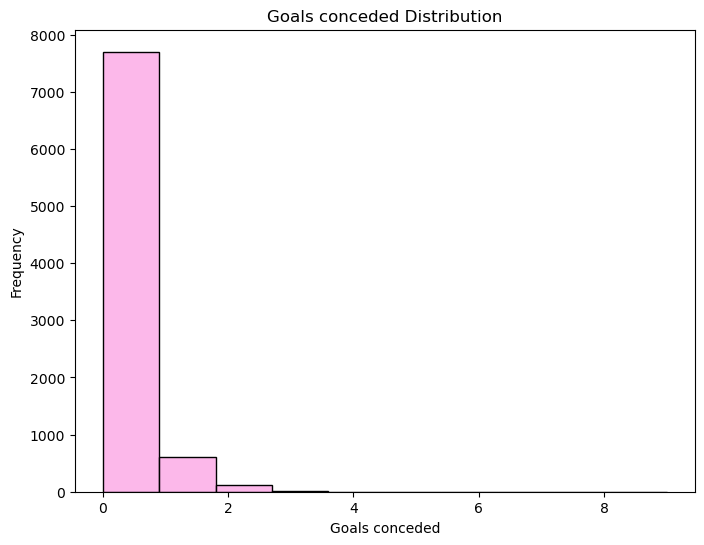

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals conceded'], bins=10, color='#fba0e3')
plt.title('Goals conceded Distribution')
plt.xlabel('Goals conceded')
plt.ylabel('Frequency')
plt.show()

In [63]:
#It has no effect on the result, so I will not cut it.

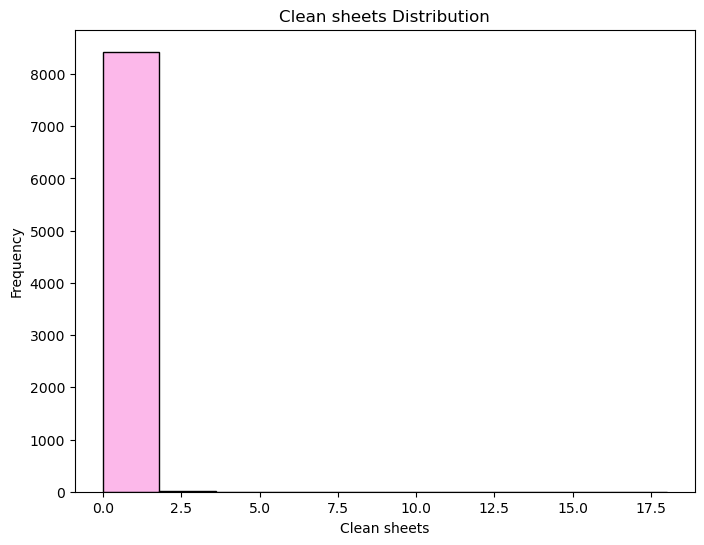

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(df['clean sheets'], bins=10, color='#fba0e3')
plt.title('Clean sheets Distribution')
plt.xlabel('Clean sheets')
plt.ylabel('Frequency')
plt.show()

In [65]:
#It has no effect on the result, so I will not cut it.

In [66]:
df.shape

(8438, 19)

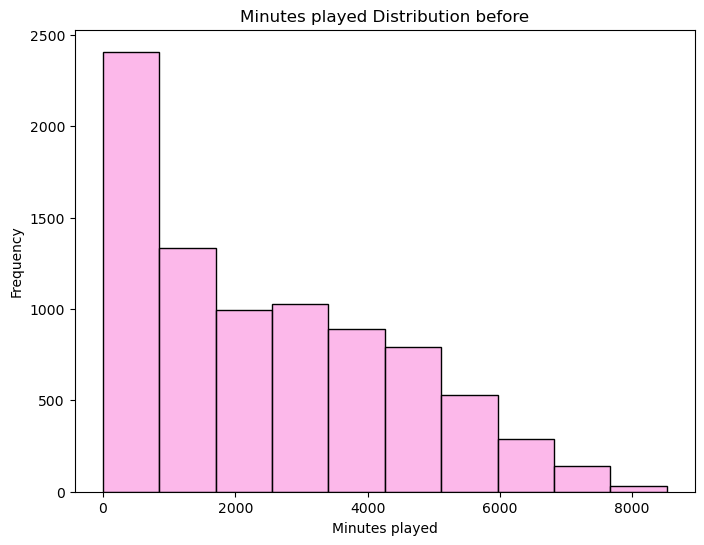

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df['minutes played'], bins=10, color='#fba0e3')
plt.title('Minutes played Distribution before')
plt.xlabel('Minutes played')
plt.ylabel('Frequency')
plt.show()

In [68]:
df = df[(df['minutes played'] <= 6900)]

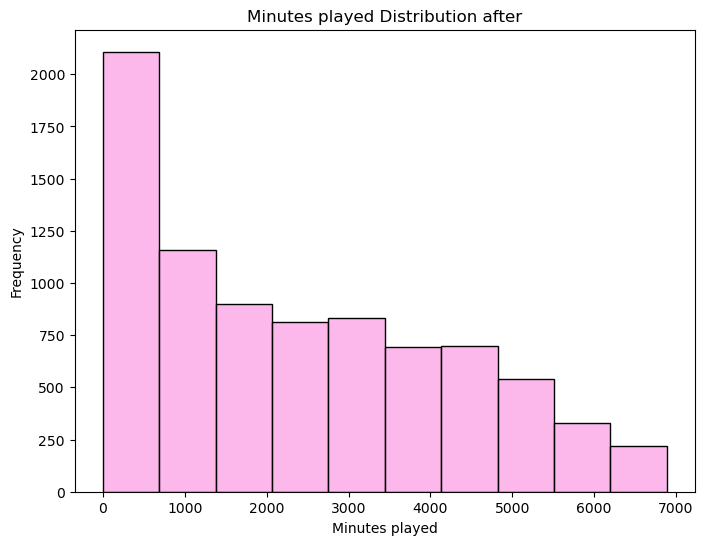

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(df['minutes played'], bins=10, color='#fba0e3')
plt.title('Minutes played Distribution after')
plt.xlabel('Minutes played')
plt.ylabel('Frequency')
plt.show()

In [70]:
df.shape

(8283, 19)

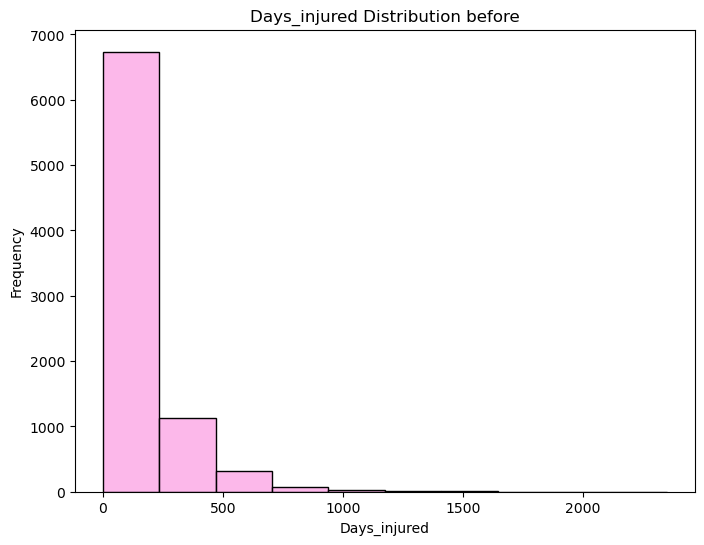

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(df['days_injured'], bins=10, color='#fba0e3')
plt.title('Days_injured Distribution before')
plt.xlabel('Days_injured')
plt.ylabel('Frequency')
plt.show()

In [72]:
df = df[(df['days_injured'] <= 320)]

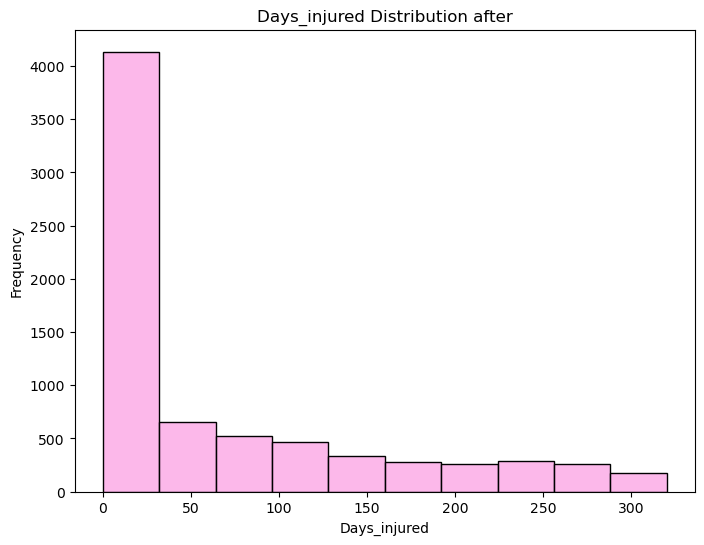

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(df['days_injured'], bins=10, color='#fba0e3')
plt.title('Days_injured Distribution after')
plt.xlabel('Days_injured')
plt.ylabel('Frequency')
plt.show()

In [74]:
df.shape

(7365, 19)

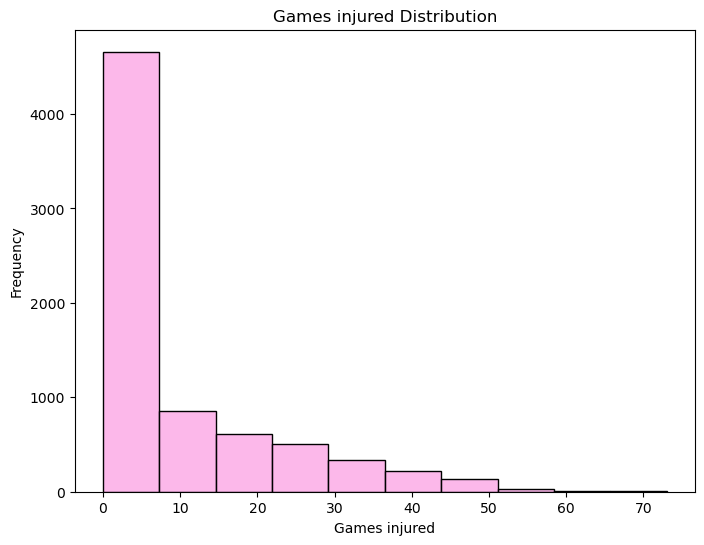

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df['games_injured'], bins=10, color='#fba0e3')
plt.title('Games injured Distribution')
plt.xlabel('Games injured')
plt.ylabel('Frequency')
plt.show()

In [76]:
df = df[(df['games_injured'] <= 40)]

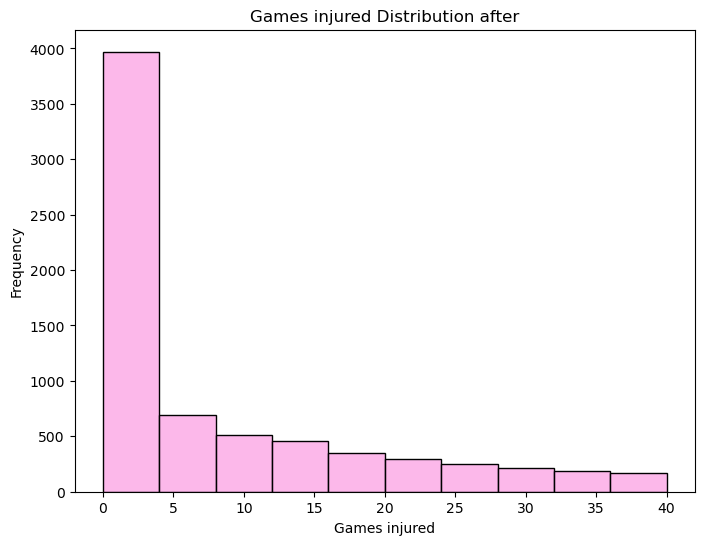

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(df['games_injured'], bins=10, color='#fba0e3')
plt.title('Games injured Distribution after')
plt.xlabel('Games injured')
plt.ylabel('Frequency')
plt.show()

In [78]:
df.shape

(7101, 19)

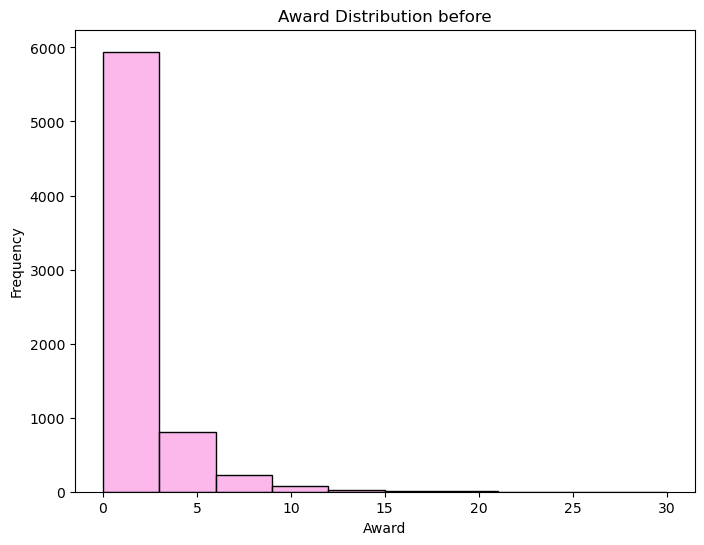

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(df['award'], bins=10, color='#fba0e3')
plt.title('Award Distribution before')
plt.xlabel('Award')
plt.ylabel('Frequency')
plt.show()

In [80]:
df = df[(df['award'] <= 5.5)]

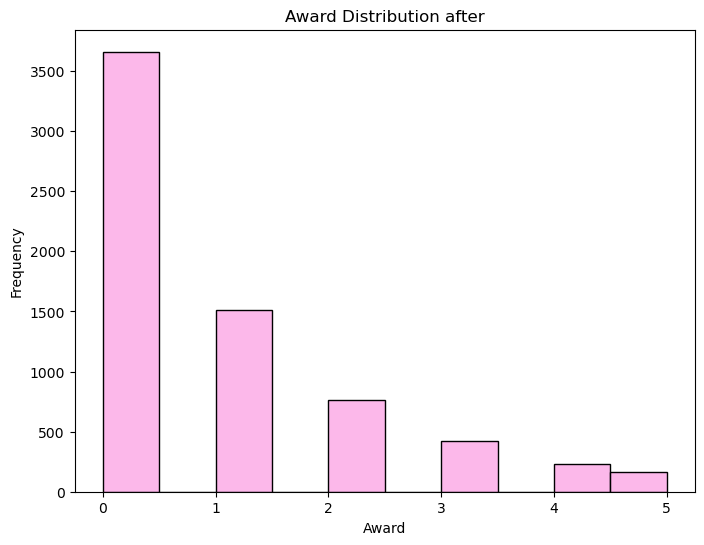

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df['award'], bins=10, color='#fba0e3')
plt.title('Award Distribution after')
plt.xlabel('Award')
plt.ylabel('Frequency')
plt.show()

In [82]:
df.shape

(6754, 19)

In [83]:
df.head(20)

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
5,Manchester United,194.0,30.0,68,0.037799,0.000000,0.302394,0.018900,0.000000,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
8,Manchester United,186.0,21.0,34,0.000000,0.000000,0.130529,0.000000,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
11,Manchester United,180.0,22.0,34,0.000000,0.033507,0.335071,0.000000,0.000000,0.000000,0.000000,2686,175,28,1,10000000,12000000,2,1
13,Manchester United,183.0,25.0,60,0.000000,0.018817,0.094083,0.000000,0.018817,0.000000,0.000000,4783,126,20,1,22000000,40000000,2,1
20,Manchester United,181.0,20.0,39,0.129125,0.064562,0.225968,0.000000,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,175.0,18.0,51,0.153759,0.102506,0.000000,0.000000,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
24,Manchester United,180.0,23.0,79,0.219780,0.109890,0.000000,0.000000,0.000000,0.000000,0.000000,4914,173,32,5,55000000,130000000,4,1
25,Manchester United,178.0,21.0,63,0.236220,0.206693,0.029528,0.000000,0.029528,0.000000,0.000000,3048,0,0,1,25000000,25000000,4,1
27,Manchester United,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,0.000000,0.000000,5906,196,22,5,70000000,75000000,4,1
28,Manchester United,174.0,21.0,34,0.000000,0.087379,0.262136,0.000000,0.000000,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1


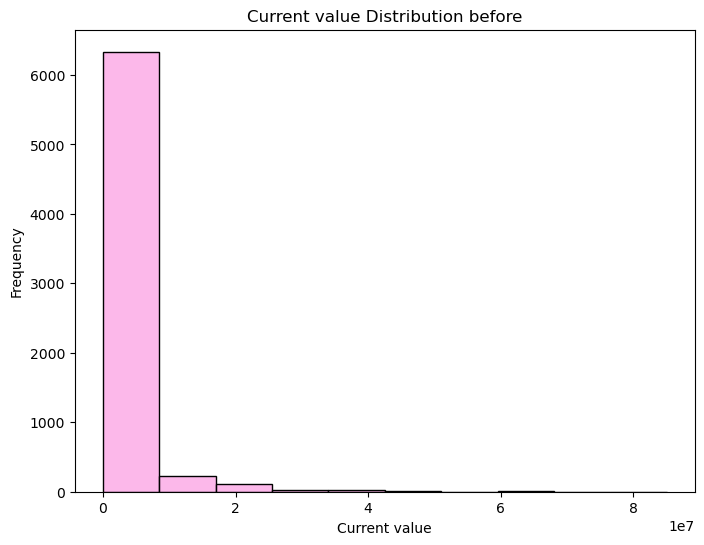

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], bins=10, color='#fba0e3')
plt.title('Current value Distribution before')
plt.xlabel('Current value')
plt.ylabel('Frequency')
plt.show()

In [85]:
df = df[(df['current_value'] <= 5200000)]

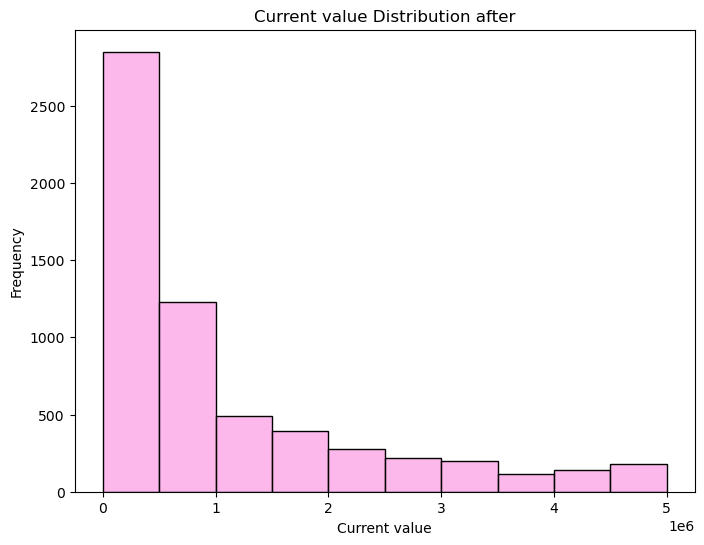

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], bins=10, color='#fba0e3')
plt.title('Current value Distribution after')
plt.xlabel('Current value')
plt.ylabel('Frequency')
plt.show()

In [87]:
df.shape

(6098, 19)

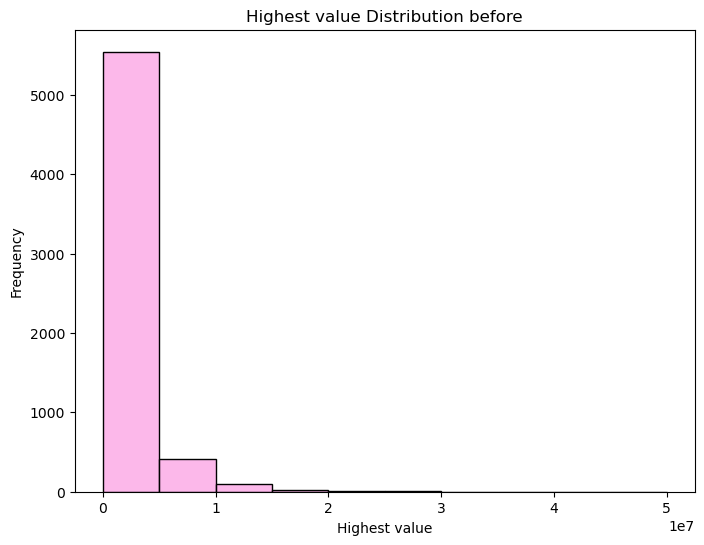

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(df['highest_value'], bins=10, color='#fba0e3')
plt.title('Highest value Distribution before')
plt.xlabel('Highest value')
plt.ylabel('Frequency')
plt.show()

In [89]:
df = df[(df['highest_value'] <= 5500000)]

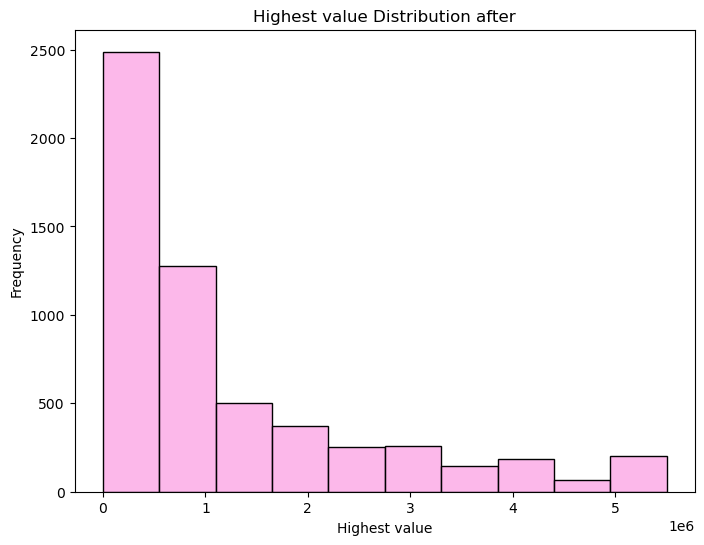

In [90]:
plt.figure(figsize=(8, 6))
sns.histplot(df['highest_value'], bins=10, color='#fba0e3')
plt.title('Highest value Distribution after')
plt.xlabel('Highest value')
plt.ylabel('Frequency')
plt.show()

In [91]:
df.shape

(5746, 19)

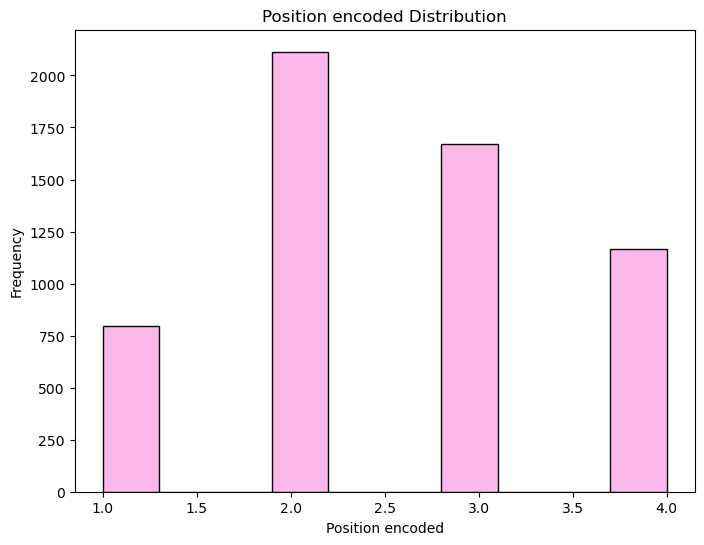

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(df['position_encoded'], bins=10, color='#fba0e3')
plt.title('Position encoded Distribution')
plt.xlabel('Position encoded')
plt.ylabel('Frequency')
plt.show()

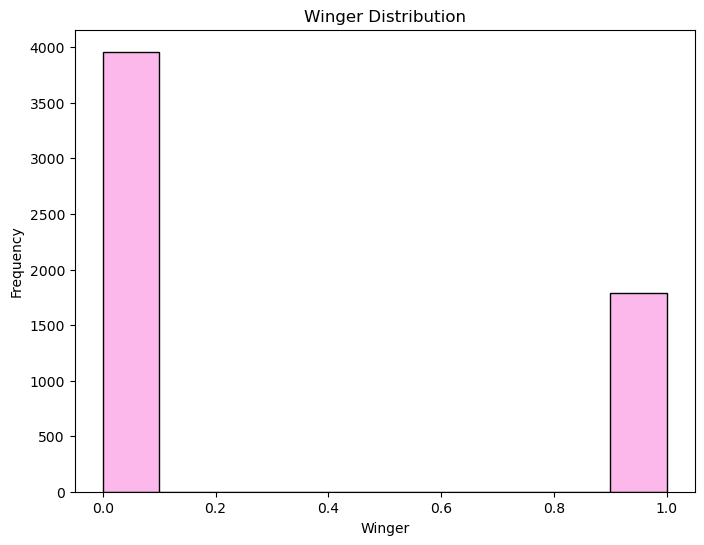

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(df['winger'], bins=10, color='#fba0e3')
plt.title('Winger Distribution')
plt.xlabel('Winger')
plt.ylabel('Frequency')
plt.show()

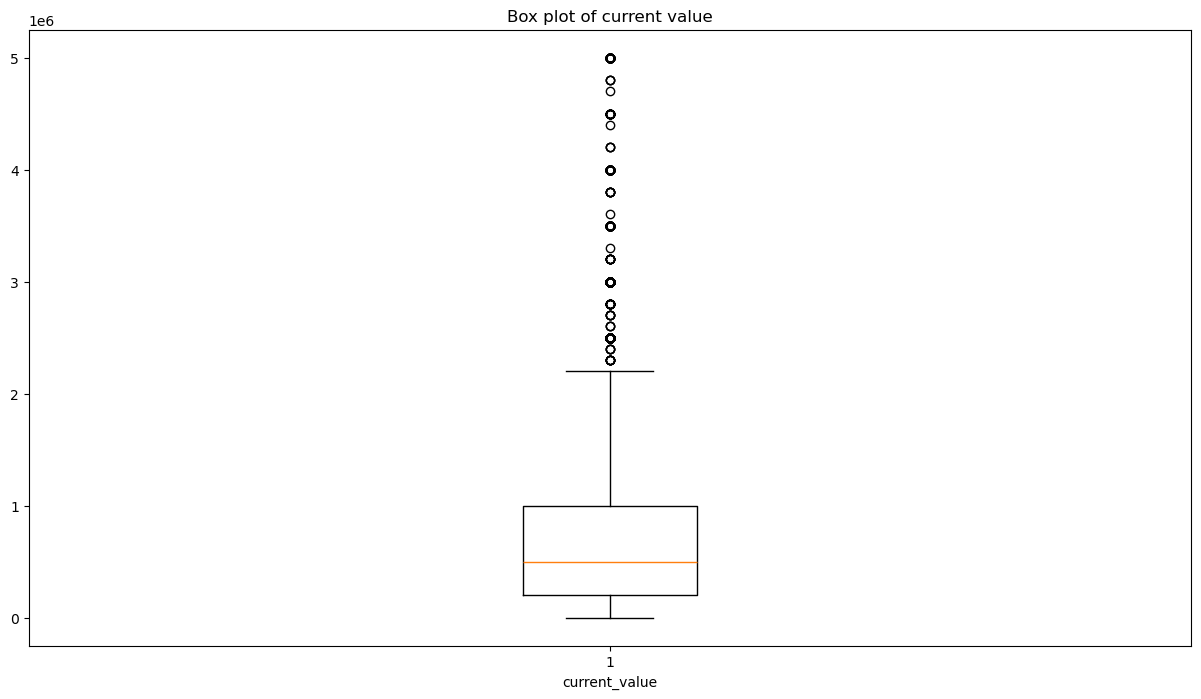

In [95]:
#Box plot after cutting
plt.figure(figsize=(15,8))
plt.boxplot(df['current_value'])
plt.xlabel('current_value')

plt.title(f'Box plot of current value')
plt.show()

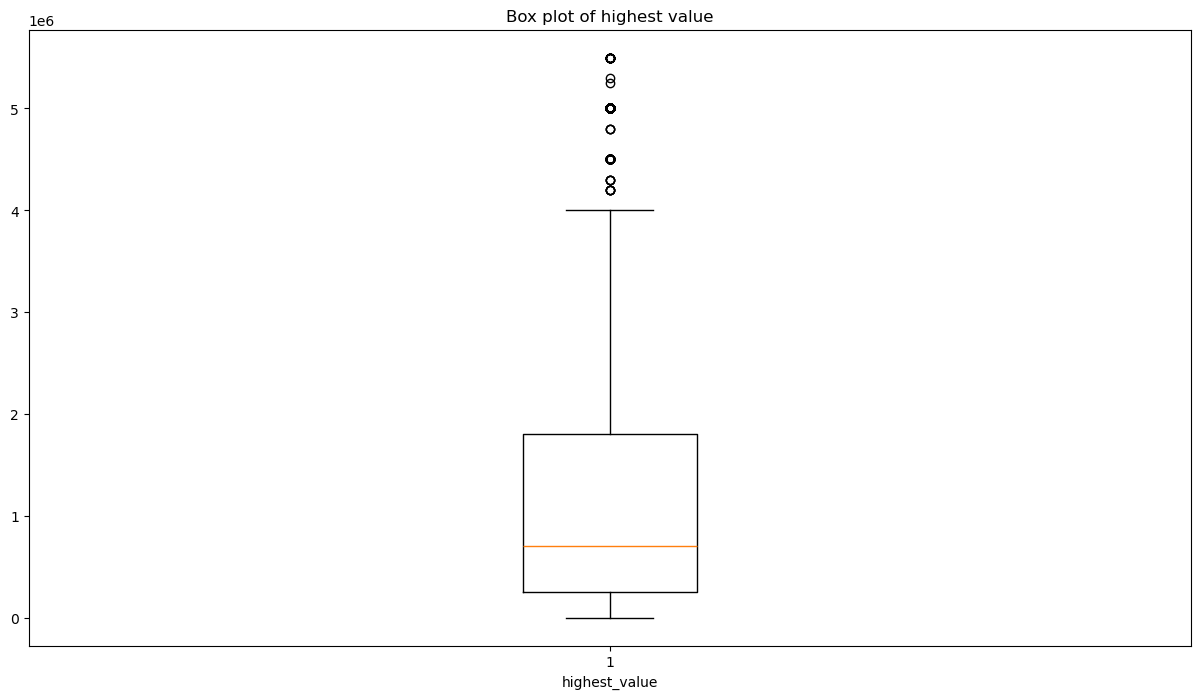

In [96]:
#Box plot after cutting
plt.figure(figsize=(15,8))
plt.boxplot(df['highest_value'])
plt.xlabel('highest_value')

plt.title(f'Box plot of highest value')
plt.show()

In [97]:
df.shape

(5746, 19)

In [98]:
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [99]:
df.columns

Index(['team', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [100]:
categorical_features = ['team']

In [101]:
for i in categorical_features:
    print (df[i].value_counts())

team
Al-Batin FC             35
Maritzburg United FC    35
Swallows FC             35
Incheon United          34
FC Seoul                34
                        ..
Arsenal FC               1
AC Milan                 1
Leeds United             1
Fulham FC                1
Liverpool FC             1
Name: count, Length: 367, dtype: int64


In [102]:
team_counts = df['team'].value_counts()
df = df[df['team'].isin(team_counts[team_counts >= 2].index)]

In [103]:
df.shape

(5735, 19)

In [104]:
df.to_csv(r"C:\Users\almal\Desktop\cleaned_data2.csv", index=False)

### 2. Univariate Non-Graphical analysis: 

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,5735.0,1.811621e+02,6.367010e+00,168.0,176.0,181.240353,1.860000e+02,1.950000e+02
age,5735.0,2.506566e+01,4.242155e+00,18.0,22.0,25.000000,2.800000e+01,3.500000e+01
appearance,5735.0,2.895065e+01,2.323707e+01,0.0,8.0,23.000000,4.900000e+01,8.900000e+01
goals,5735.0,6.601381e-02,9.773056e-02,0.0,0.0,0.000000,1.000880e-01,4.000000e-01
assists,5735.0,4.693069e-02,6.575886e-02,0.0,0.0,0.000000,8.419083e-02,2.500000e-01
yellow cards,5735.0,1.956865e-01,5.458185e-01,0.0,0.0,0.145396,2.538956e-01,3.000000e+01
second yellow cards,5735.0,4.436394e-03,2.151355e-02,0.0,0.0,0.000000,0.000000e+00,5.590062e-01
red cards,5735.0,8.096406e-03,1.079271e-01,0.0,0.0,0.000000,0.000000e+00,6.923077e+00
goals conceded,5735.0,1.556776e-01,4.920739e-01,0.0,0.0,0.000000,0.000000e+00,9.000000e+00
clean sheets,5735.0,4.314511e-02,3.943959e-01,0.0,0.0,0.000000,0.000000e+00,1.800000e+01


In [107]:
df.describe(include='object').T

,count,unique,top,freq
team,5735,356,Al-Batin FC,35


In [108]:
print(df['current_value'].mean())
print(df['current_value'].std())

886321.7088055798
1055918.0706853394


## 4. Bivariate/Multivariate Analysis:

In [110]:
corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
height,1.000000,0.027091,-0.000787,-0.126881,-0.241711,-0.055074,0.002885,-0.007799,0.339699,0.116529,0.083046,0.036030,0.032318,0.020388,-0.001552,0.006526,-0.424898,-0.381008
age,0.027091,1.000000,0.136829,-0.017867,0.023997,0.013932,0.026151,0.005538,0.055956,0.016987,0.168065,0.245355,0.255376,0.307080,-0.003258,0.213051,-0.091528,-0.015192
appearance,-0.000787,0.136829,1.000000,0.324981,0.417008,-0.011009,0.026699,-0.022942,-0.102003,-0.059064,0.947313,0.145412,0.158041,0.134909,0.380520,0.383562,0.112727,0.087773
goals,-0.126881,-0.017867,0.324981,1.000000,0.424200,-0.006791,0.021926,-0.011722,-0.211707,-0.073248,0.201926,0.064984,0.064008,0.061455,0.135674,0.148002,0.492097,0.070912
assists,-0.241711,0.023997,0.417008,0.424200,1.000000,-0.002409,0.005336,-0.017423,-0.225826,-0.078087,0.309171,0.100419,0.107969,0.086905,0.209244,0.223612,0.346679,0.256300
yellow cards,-0.055074,0.013932,-0.011009,-0.006791,-0.002409,1.000000,0.017207,-0.004085,-0.081886,-0.030232,-0.026105,0.034682,0.034192,-0.000262,0.020157,0.026536,0.093551,0.015145
second yellow cards,0.002885,0.026151,0.026699,0.021926,0.005336,0.017207,1.000000,-0.002777,-0.058302,-0.019940,0.023459,0.001907,0.005146,0.007330,0.039662,0.047444,0.009034,-0.001645
red cards,-0.007799,0.005538,-0.022942,-0.011722,-0.017423,-0.004085,-0.002777,1.000000,-0.011184,-0.002539,-0.023311,0.004060,0.001984,-0.014692,0.000580,0.005740,0.015804,-0.009483
goals conceded,0.339699,0.055956,-0.102003,-0.211707,-0.225826,-0.081886,-0.058302,-0.011184,1.000000,0.154604,-0.010564,-0.018187,-0.023820,0.007721,-0.101227,-0.091652,-0.512476,-0.212780
clean sheets,0.116529,0.016987,-0.059064,-0.073248,-0.078087,-0.030232,-0.019940,-0.002539,0.154604,1.000000,-0.033467,-0.019643,-0.022533,0.010661,-0.043307,-0.043182,-0.177205,-0.073576


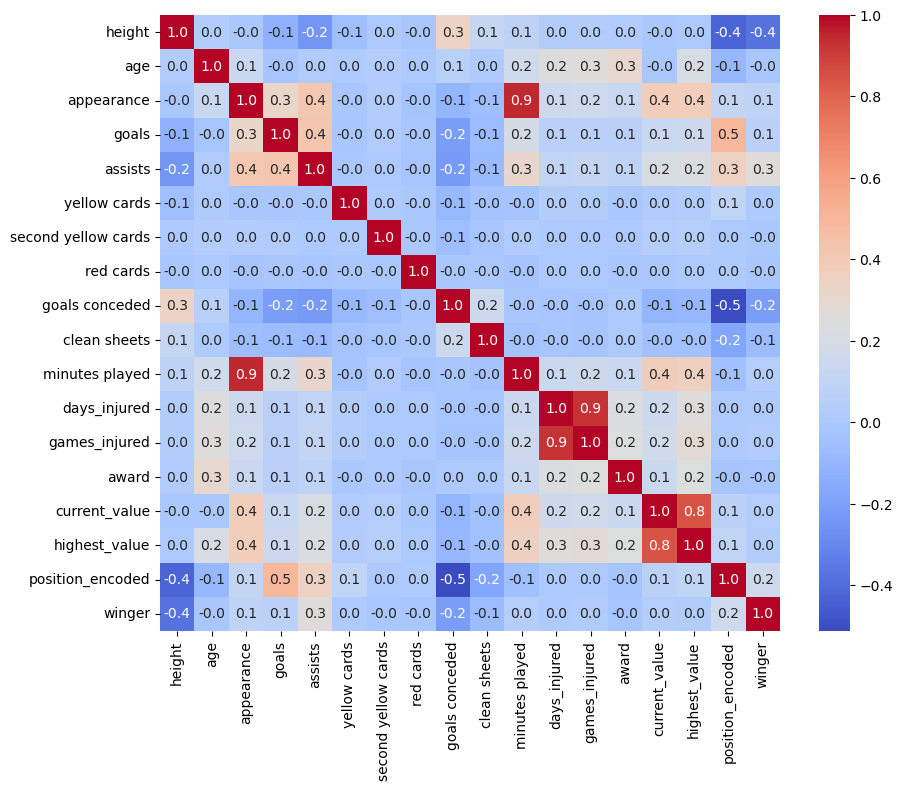

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

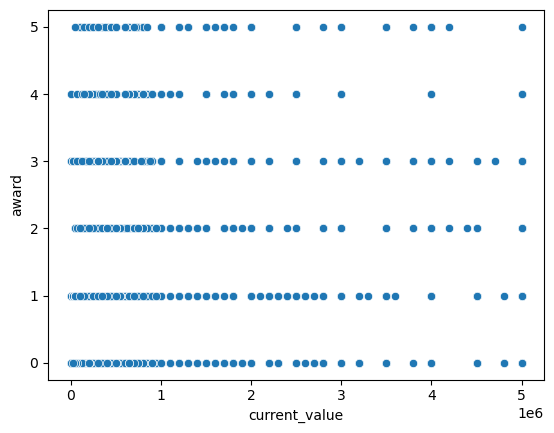

In [113]:
sns.scatterplot(y='award', x='current_value',
                data=df)

plt.show()

<Axes: >

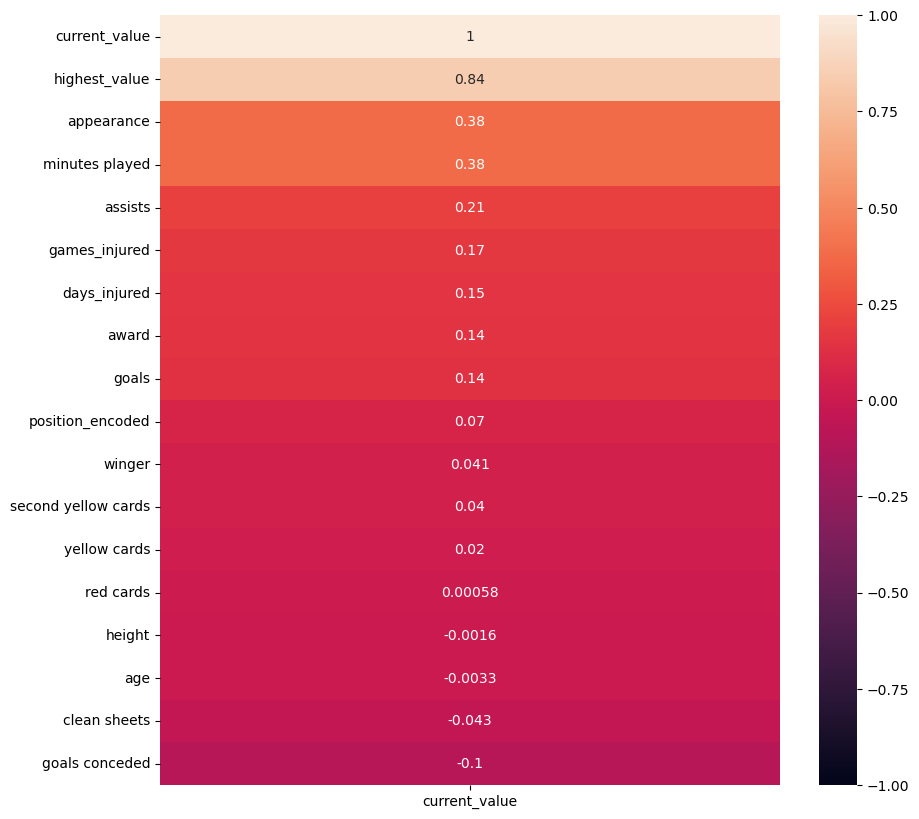

In [114]:
numeric =  df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['current_value']].sort_values('current_value', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)